In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as spst
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic') # 한글 깨짐

In [2]:
data = pd.read_csv('./06_은행영업일.csv', encoding='cp949')
real_df = data.copy()
real_df

,날짜,신고건수,Week,월요일,화요일,수요일,목요일,금요일,토요일,일요일,...,확진자수,소비자물가지수,비트코인거래량,네이버_보이스피싱,다음카카오_보이스피싱,구글_보이스피싱,네이버_대출,다음카카오_대출,구글_대출검색,은행영업일
0,2020-01-01,0,1,0,0,1,0,0,0,0,...,0,100.09,420280,4.18055,7,2.25,11.31068,9,19.75,0
1,2020-01-02,29,1,0,0,0,1,0,0,0,...,0,100.09,632780,10.54166,12,2.25,26.11826,28,19.75,1
2,2020-01-03,31,1,0,0,0,0,1,0,0,...,0,100.09,936290,12.61111,14,2.25,22.39576,23,19.75,1
3,2020-01-04,6,1,0,0,0,0,0,1,0,...,0,100.09,523910,6.76388,11,2.25,12.65998,11,19.75,0
4,2020-01-05,2,1,0,0,0,0,0,0,1,...,0,100.09,628140,6.83333,8,2.25,13.93552,13,19.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2023-01-14,12,2,0,0,0,0,0,1,0,...,36552,110.10,458210,10.38888,9,8.50,20.79916,14,24.00,0
1110,2023-01-15,9,2,0,0,0,0,0,0,1,...,32570,110.10,205800,10.45833,8,8.00,20.66033,11,23.00,0
1111,2023-01-16,23,3,1,0,0,0,0,0,0,...,14144,110.10,337460,18.83333,18,8.00,39.82819,26,23.00,1
1112,2023-01-17,23,3,0,1,0,0,0,0,0,...,40199,110.10,310040,21.19444,23,8.00,33.38539,24,23.00,1


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# x = 날짜 
* 추세를 보여주고 싶음

In [3]:
# 금리
# 2020년 1~2월, 3~5월1일, 2020년 5월2일 ~ 2021년 8월 1일
# 2021년 8월 2일 ~ 
real_df['날짜'] = pd.to_datetime(real_df['날짜'])
real_df_2020 = real_df.loc[real_df['날짜'].dt.year == 2020]
real_df_2021 = real_df.loc[real_df['날짜'].dt.year == 2021]
real_df_2022 = real_df.loc[real_df['날짜'].dt.year == 2022]
#real_df_2023 = real_df.loc[real_df['날짜'].dt.year == 2023]

## 날짜 -> 뉴스개수

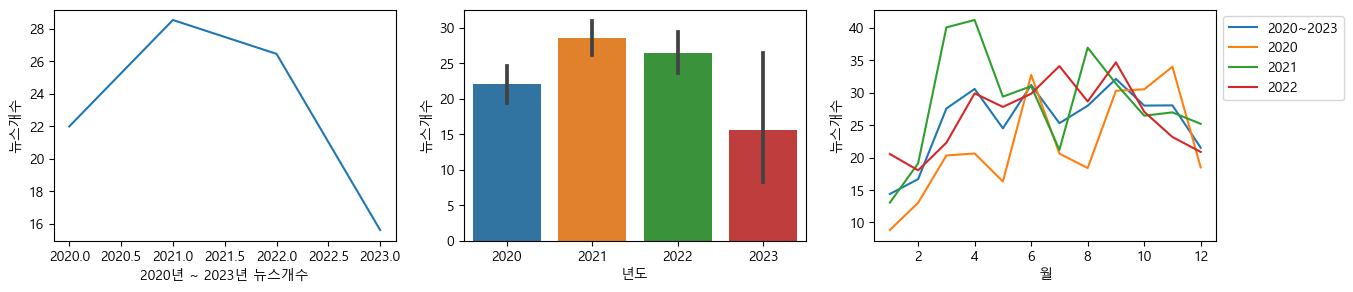

In [20]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['뉴스개수'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 뉴스개수')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['뉴스개수'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['뉴스개수'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['뉴스개수'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['뉴스개수'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['뉴스개수'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## 날짜 -> 신고건수

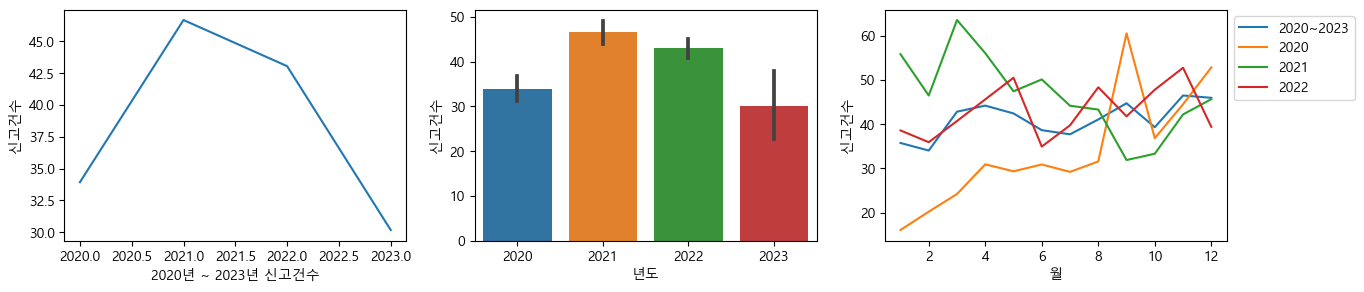

In [23]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['신고건수'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 신고건수')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['신고건수'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['신고건수'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['신고건수'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['신고건수'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['신고건수'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## 날짜 -> 금리

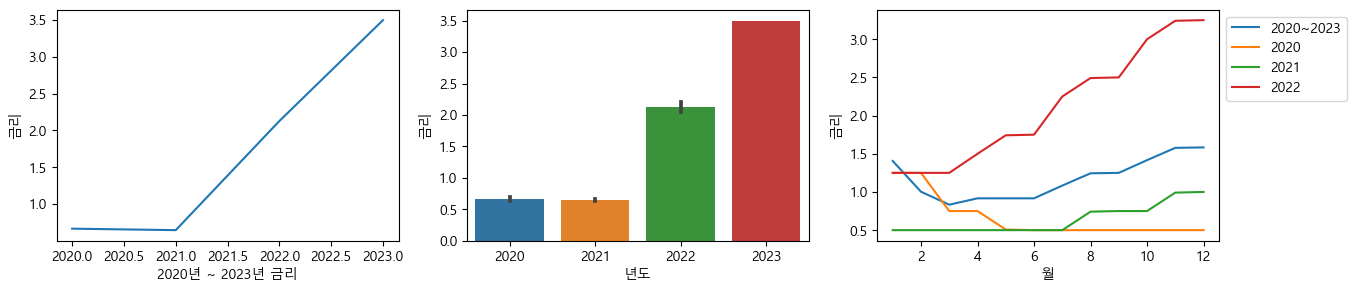

In [26]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['금리'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 금리')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['금리'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['금리'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['금리'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['금리'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['금리'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

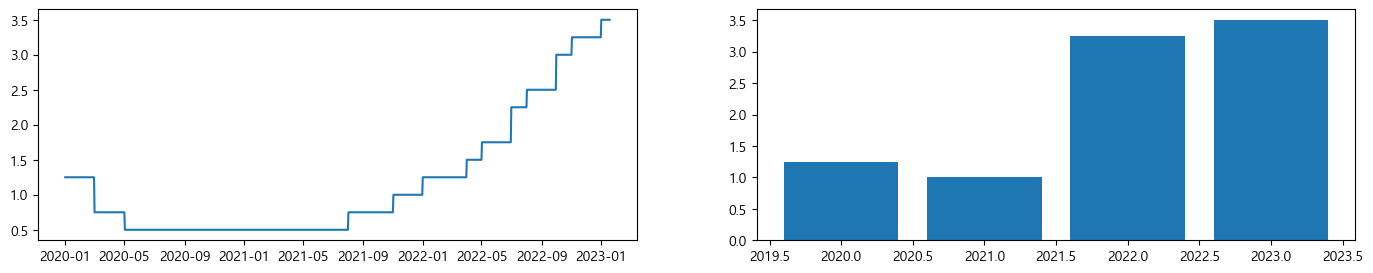

In [29]:
plt.figure(figsize=(17,3))
plt.subplot(1,2,1)
plt.plot(real_df['날짜'], real_df['금리'])

plt.subplot(1,2,2)
plt.bar(real_df['날짜'].dt.year, real_df['금리'])
plt.show()

## 날짜 -> 네이버_보이스피싱

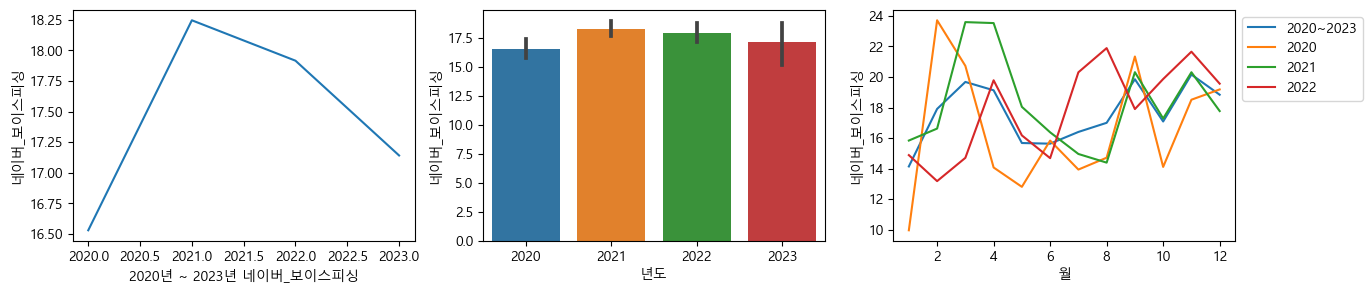

In [30]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['네이버_보이스피싱'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 네이버_보이스피싱')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['네이버_보이스피싱'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['네이버_보이스피싱'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['네이버_보이스피싱'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['네이버_보이스피싱'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['네이버_보이스피싱'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

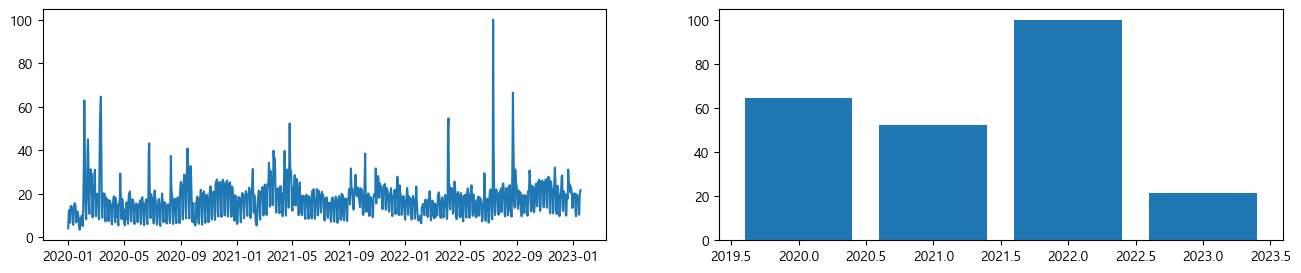

In [33]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.plot(real_df['날짜'], real_df['네이버_보이스피싱'])

plt.subplot(1,2,2)
plt.bar(real_df['날짜'].dt.year, real_df['네이버_보이스피싱'])
plt.show()

## 날짜 -> 다음카카오_보이스피싱

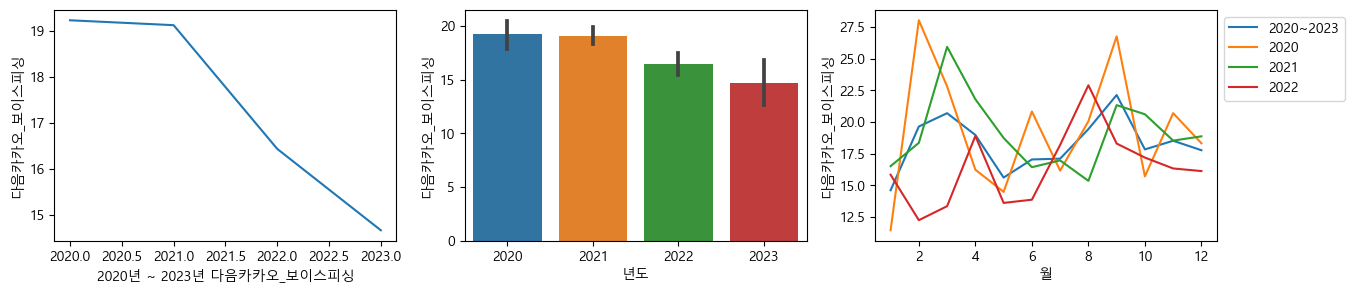

In [37]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['다음카카오_보이스피싱'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 다음카카오_보이스피싱')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['다음카카오_보이스피싱'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['다음카카오_보이스피싱'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['다음카카오_보이스피싱'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['다음카카오_보이스피싱'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['다음카카오_보이스피싱'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## 날짜 -> 네이버_대출

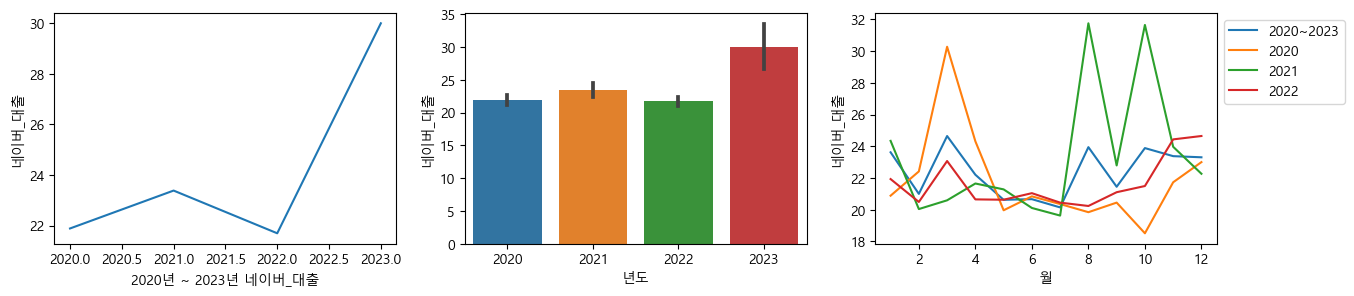

In [38]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['네이버_대출'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 네이버_대출')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['네이버_대출'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['네이버_대출'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['네이버_대출'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['네이버_대출'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['네이버_대출'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## 날짜 -> 다음카카오_대출

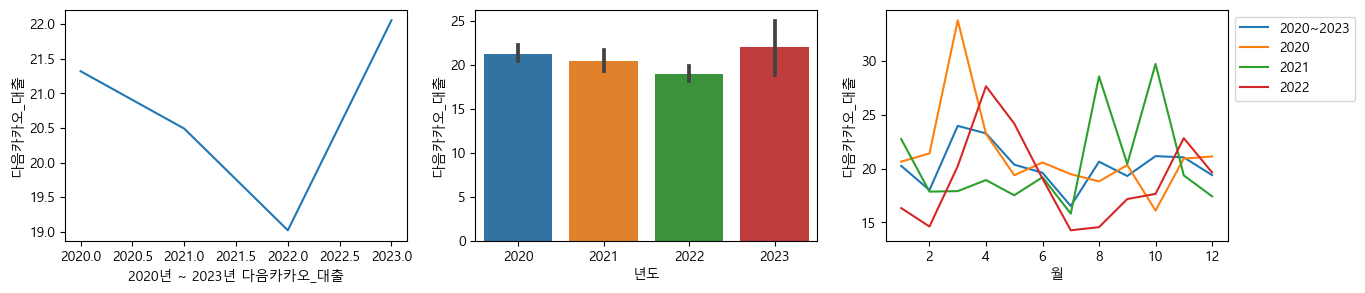

In [41]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['다음카카오_대출'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 다음카카오_대출')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['다음카카오_대출'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['다음카카오_대출'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['다음카카오_대출'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['다음카카오_대출'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['다음카카오_대출'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

## 날짜 -> 누적확진자수

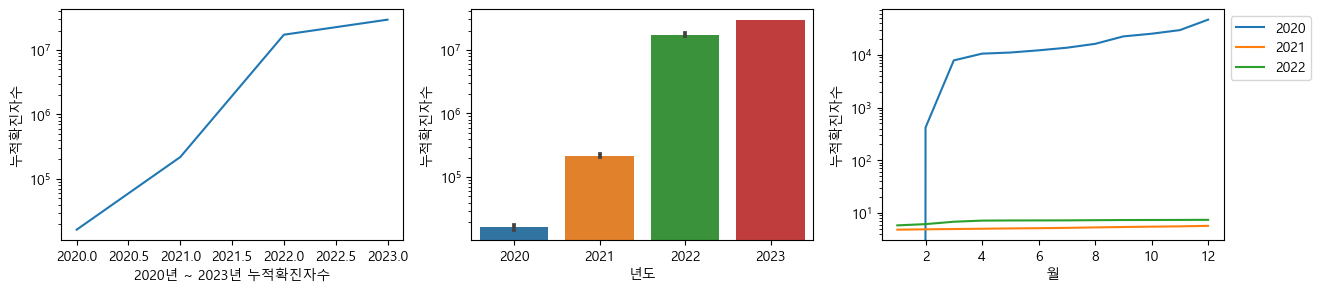

In [44]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['누적확진자수'], ci=None) # 년도별
plt.yscale('log')
plt.xlabel('2020년 ~ 2023년 누적확진자수')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['누적확진자수'])
plt.yscale('log')
plt.xlabel('년도')

plt.subplot(1,3,3)
#sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['누적확진자수'], label='2020~2023', ci=None) # 너무 값이 커서 제외함
#plt.yscale('log')
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['누적확진자수'], label='2020', ci=None)
plt.yscale('log')
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['누적확진자수'], label='2021', ci=None)
plt.yscale('log')
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['누적확진자수'], label='2022', ci=None)
plt.yscale('log')
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

## 날짜 -> 확진자수

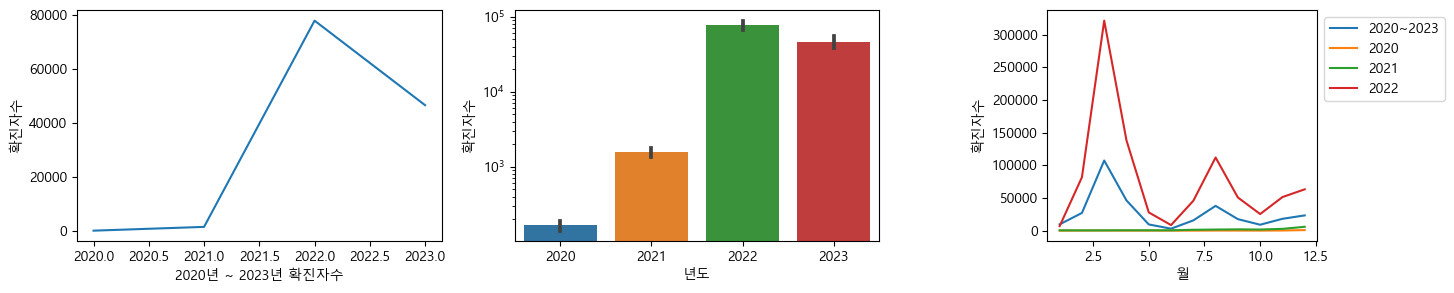

In [50]:
plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['확진자수'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 확진자수')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['확진자수'])
plt.yscale('log')
plt.xlabel('년도')

plt.subplot(1,4,4) # (1, 3, 3) 으로 진행하면 (1, 3, 2)와 겹침
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['확진자수'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['확진자수'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['확진자수'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['확진자수'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

## 날짜 -> 소비자 물가지수

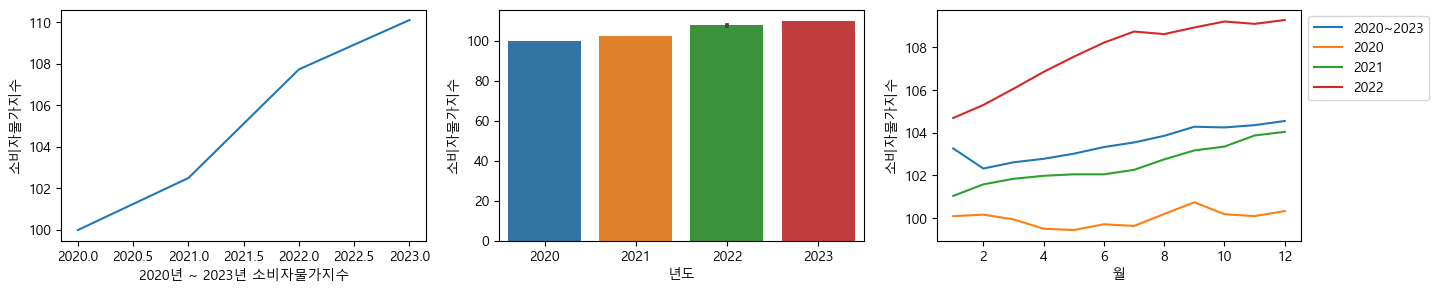

In [51]:
plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['소비자물가지수'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 소비자물가지수')

plt.subplot(1,3,2)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['소비자물가지수'])
plt.xlabel('년도')

plt.subplot(1,3,3)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['소비자물가지수'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['소비자물가지수'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['소비자물가지수'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['소비자물가지수'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## 날짜 -> 비트코인 거래량

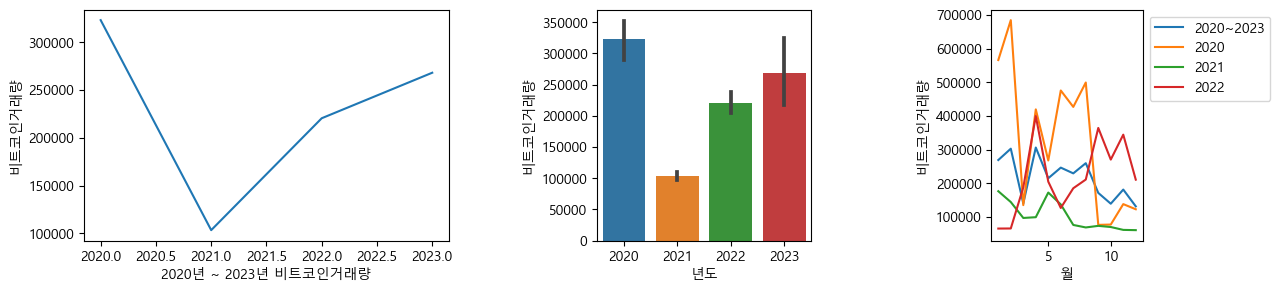

In [76]:
plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
sns.lineplot(x=real_df['날짜'].dt.year, y=real_df['비트코인거래량'], ci=None) # 년도별
plt.xlabel('2020년 ~ 2023년 비트코인거래량')

plt.subplot(1,5,3)
sns.barplot(x=real_df['날짜'].dt.year, y=real_df['비트코인거래량'])
plt.xlabel('년도')

plt.subplot(1,7,6)
sns.lineplot(x=real_df['날짜'].dt.month, y=real_df['비트코인거래량'], label='2020~2023', ci=None) # 월별
sns.lineplot(x=real_df_2020['날짜'].dt.month, y=real_df_2020['비트코인거래량'], label='2020', ci=None)
sns.lineplot(x=real_df_2021['날짜'].dt.month, y=real_df_2021['비트코인거래량'], label='2021', ci=None)
sns.lineplot(x=real_df_2022['날짜'].dt.month, y=real_df_2022['비트코인거래량'], label='2022', ci=None)
plt.xlabel('월')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

***

# x = 신고건수
* 위: 년도 구분o     
* 아래: 년도 구분x

## 신고건수 -> 뉴스개수

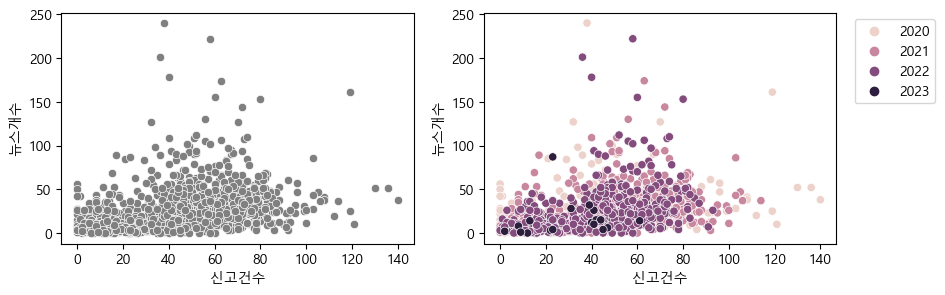

In [112]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['뉴스개수'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['뉴스개수'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 신고건수 -> 금리

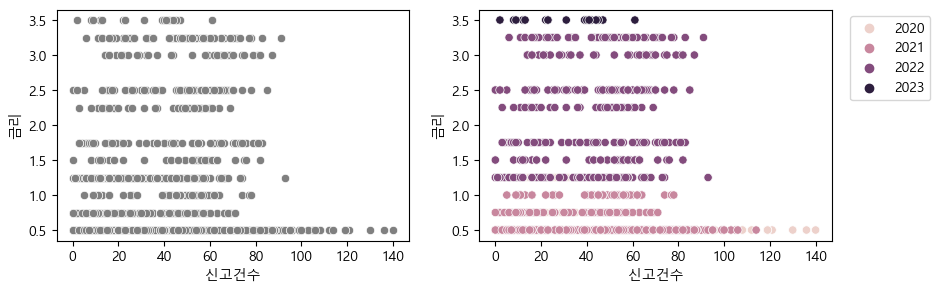

In [111]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['금리'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['금리'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 신고건수 -> 누적확진자수

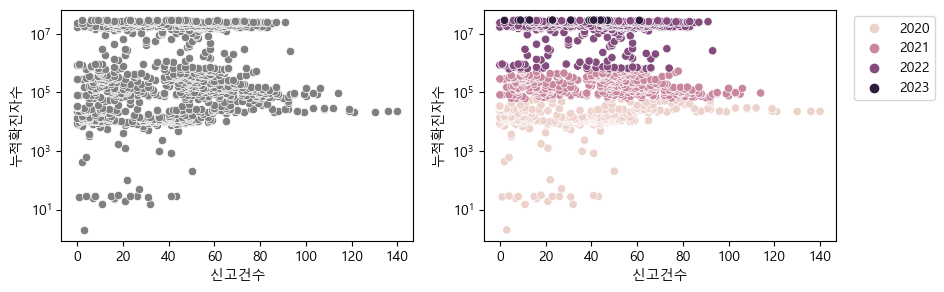

In [110]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['누적확진자수'], color='gray')
plt.yscale('log')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['누적확진자수'], hue=real_df['날짜'].dt.year)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 신고건수 -> 확진자수

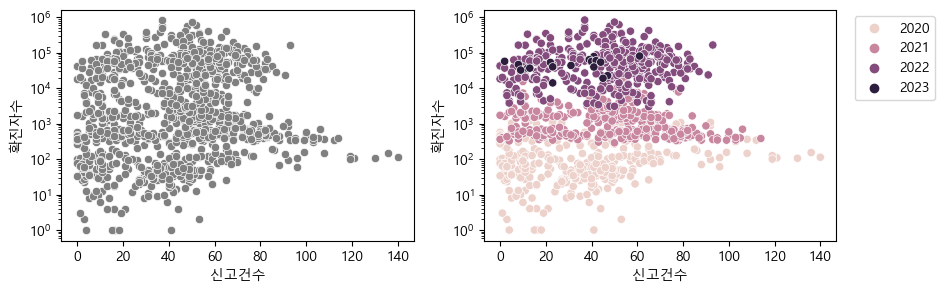

In [109]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['확진자수'], color='gray')
plt.yscale('log')
plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['확진자수'], hue=real_df['날짜'].dt.year)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 1))


plt.show()

## 신고건수 -> 소비자물가지수

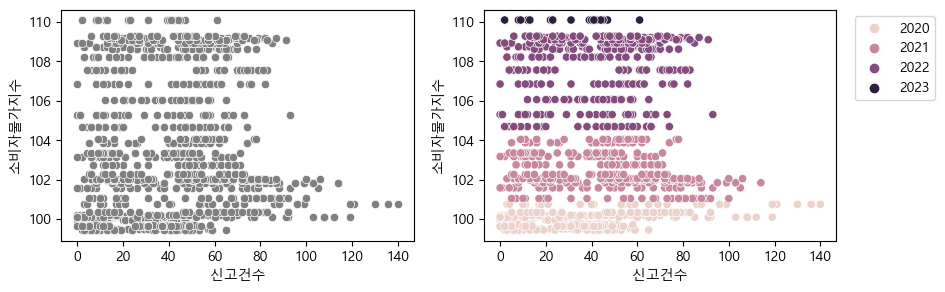

In [107]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['소비자물가지수'], color='gray')
plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['소비자물가지수'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 신고건수 -> 비트코인거래량

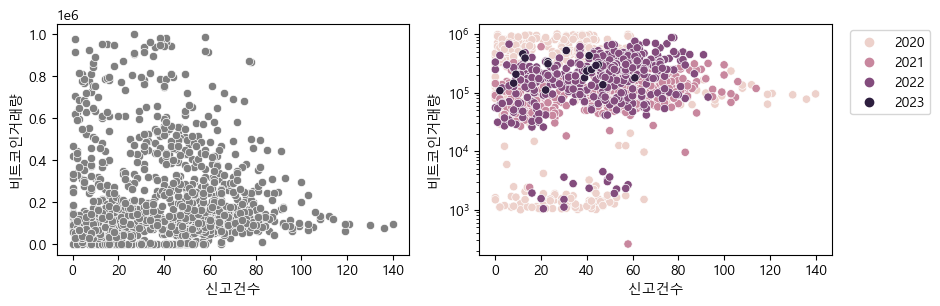

In [106]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['비트코인거래량'], color='gray')
plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['비트코인거래량'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.yscale('log')

plt.yscale('log')
plt.show()

## 신고건수 -> 네이버_보이스피싱

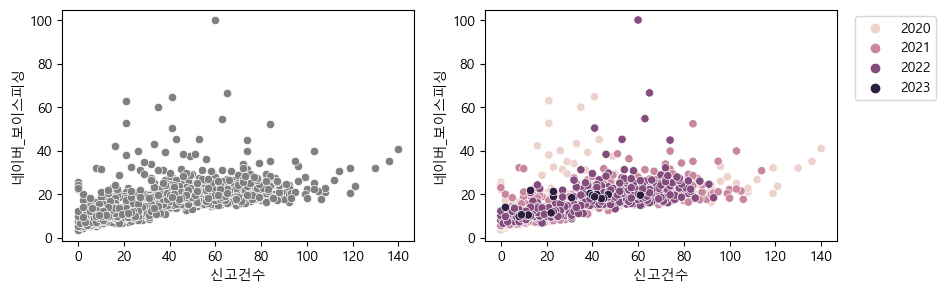

In [105]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['네이버_보이스피싱'], color='gray')
plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['네이버_보이스피싱'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 신고건수 -> 다음카카오_보이스피싱

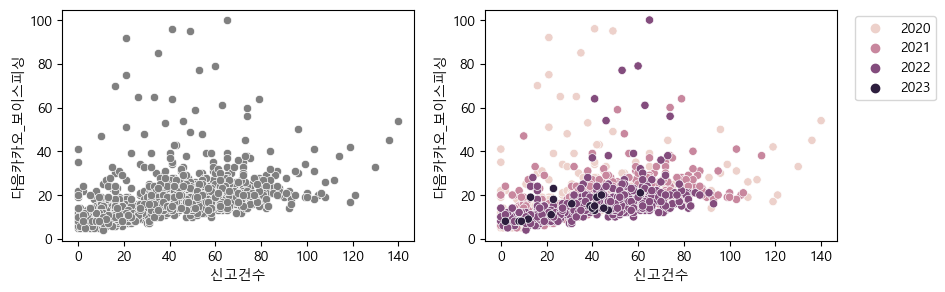

In [104]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['다음카카오_보이스피싱'], color='gray')
plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['다음카카오_보이스피싱'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 신고건수 -> 네이버_대출

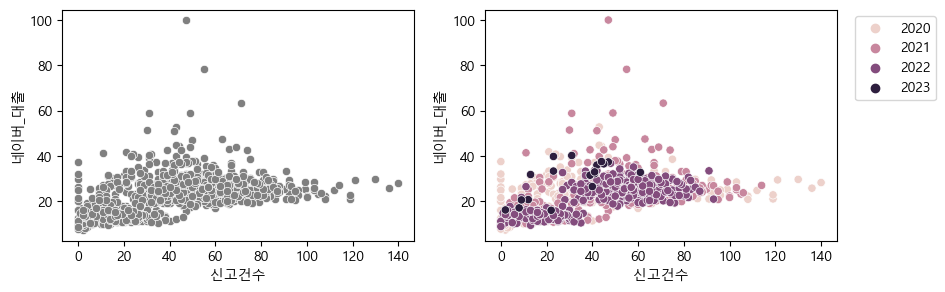

In [103]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['네이버_대출'], color='gray')
plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['네이버_대출'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 신고건수 -> 다음카카오_대출

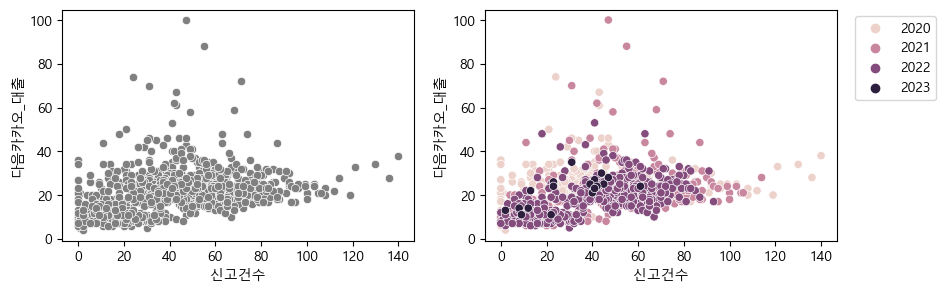

In [102]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['신고건수'], y=real_df['다음카카오_대출'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['신고건수'], y=real_df['다음카카오_대출'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

***

# x = 뉴스개수

## 뉴스개수 -> 신고건수

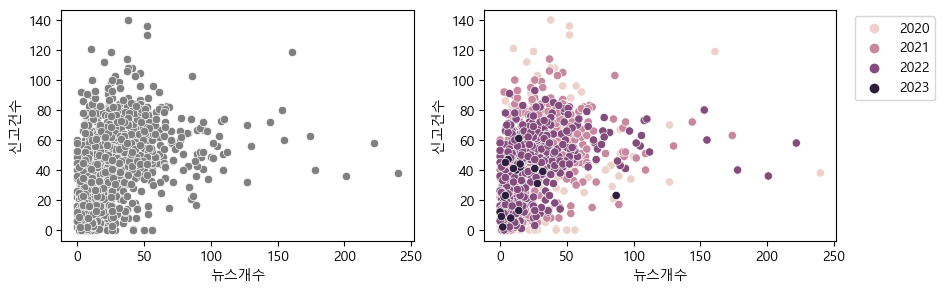

In [101]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['신고건수'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['신고건수'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## 뉴스개수 -> 금리

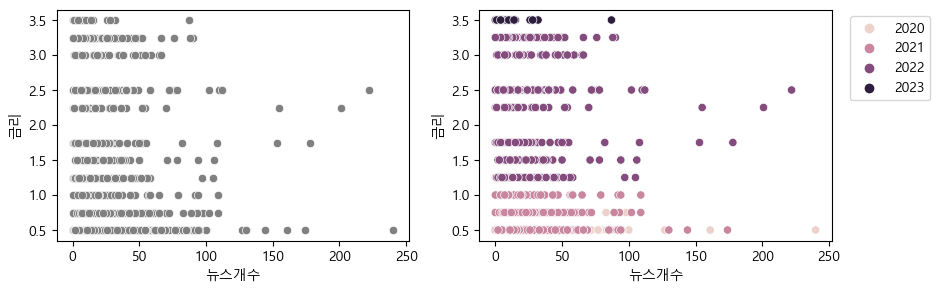

In [100]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['금리'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['금리'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## 뉴스개수 -> 누적확진자수

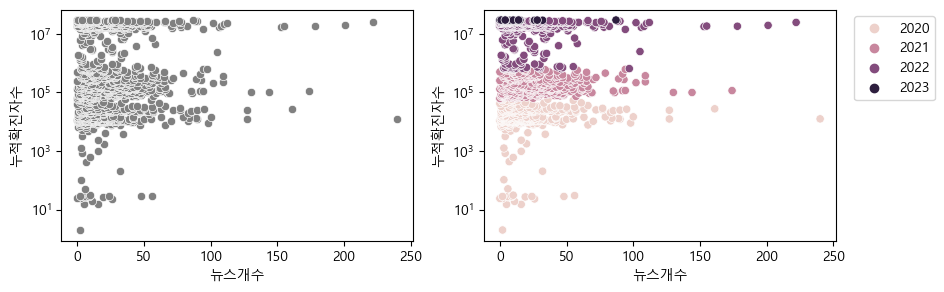

In [99]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['누적확진자수'], color='gray')
plt.yscale('log')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['누적확진자수'], hue=real_df['날짜'].dt.year)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 뉴스개수 -> 확진자수

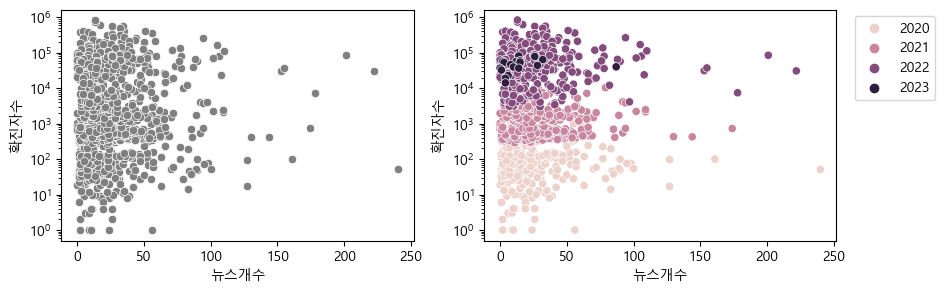

In [98]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['확진자수'], color='gray')
plt.yscale('log')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['확진자수'], hue=real_df['날짜'].dt.year)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## 뉴스개수 -> 소비자물가지수

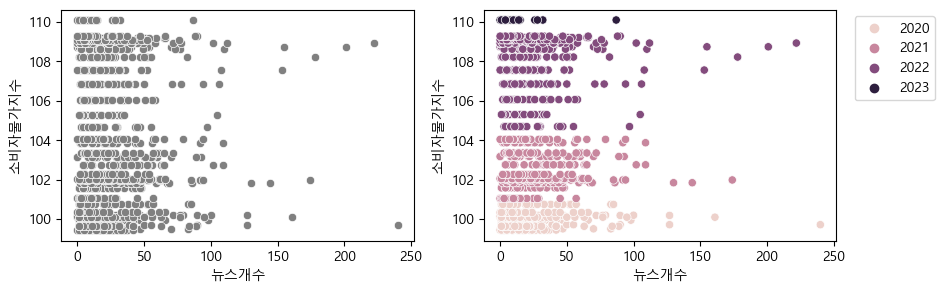

In [114]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['소비자물가지수'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['소비자물가지수'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## 뉴스개수 -> 비트코인거래량

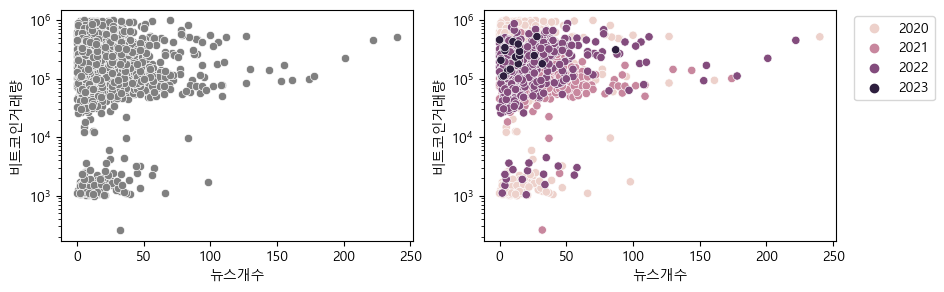

In [115]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['비트코인거래량'], color='gray')
plt.yscale('log')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['비트코인거래량'], hue=real_df['날짜'].dt.year)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## 뉴스개수 -> 네이버_보이스피싱

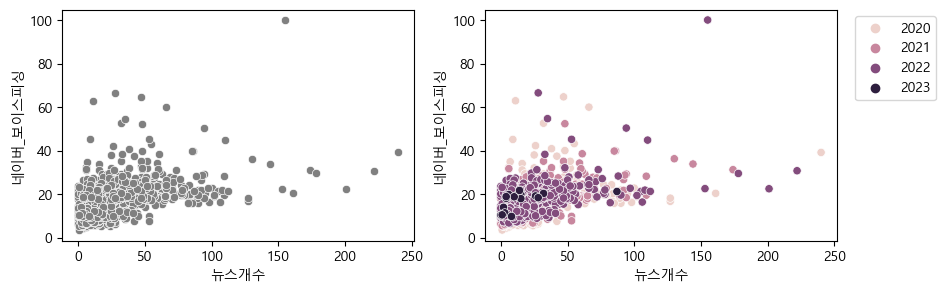

In [116]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['네이버_보이스피싱'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['네이버_보이스피싱'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## 뉴스개수 -> 다음카카오_보이스피싱

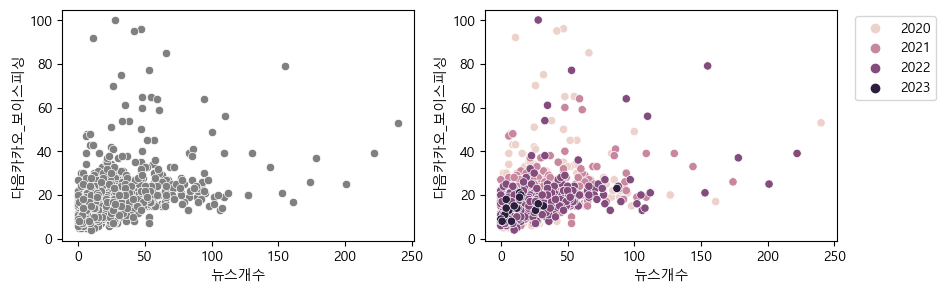

In [117]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['다음카카오_보이스피싱'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['다음카카오_보이스피싱'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))

plt.show()

## 뉴스개수 -> 네이버_대출

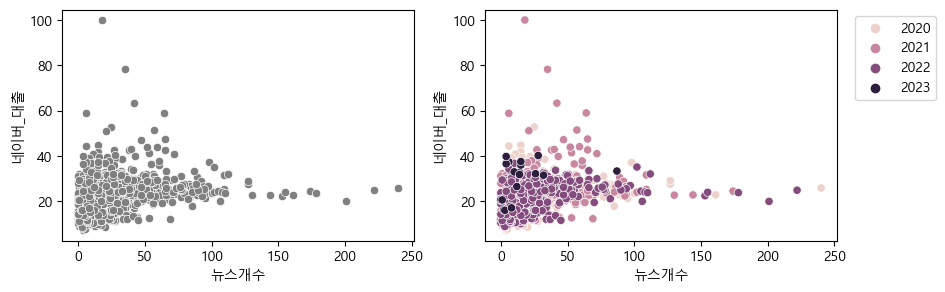

In [118]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['네이버_대출'], color='gray')

plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['네이버_대출'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

## 뉴스개수 -> 다음카카오_대출

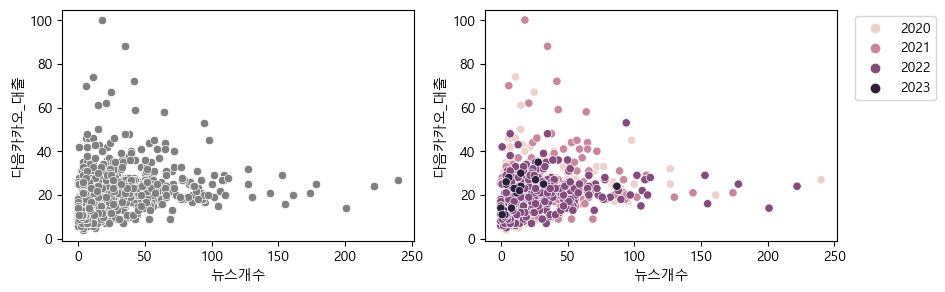

In [119]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['다음카카오_대출'], color='gray')
plt.subplot(1,2,2)
sns.scatterplot(x=real_df['뉴스개수'], y=real_df['다음카카오_대출'], hue=real_df['날짜'].dt.year)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

***

# y = 신고건수

## Week -> 신고건수

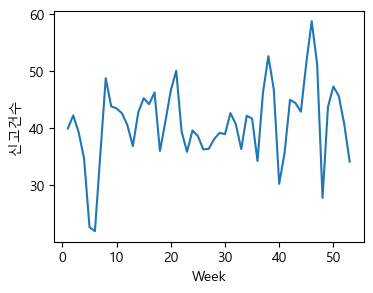

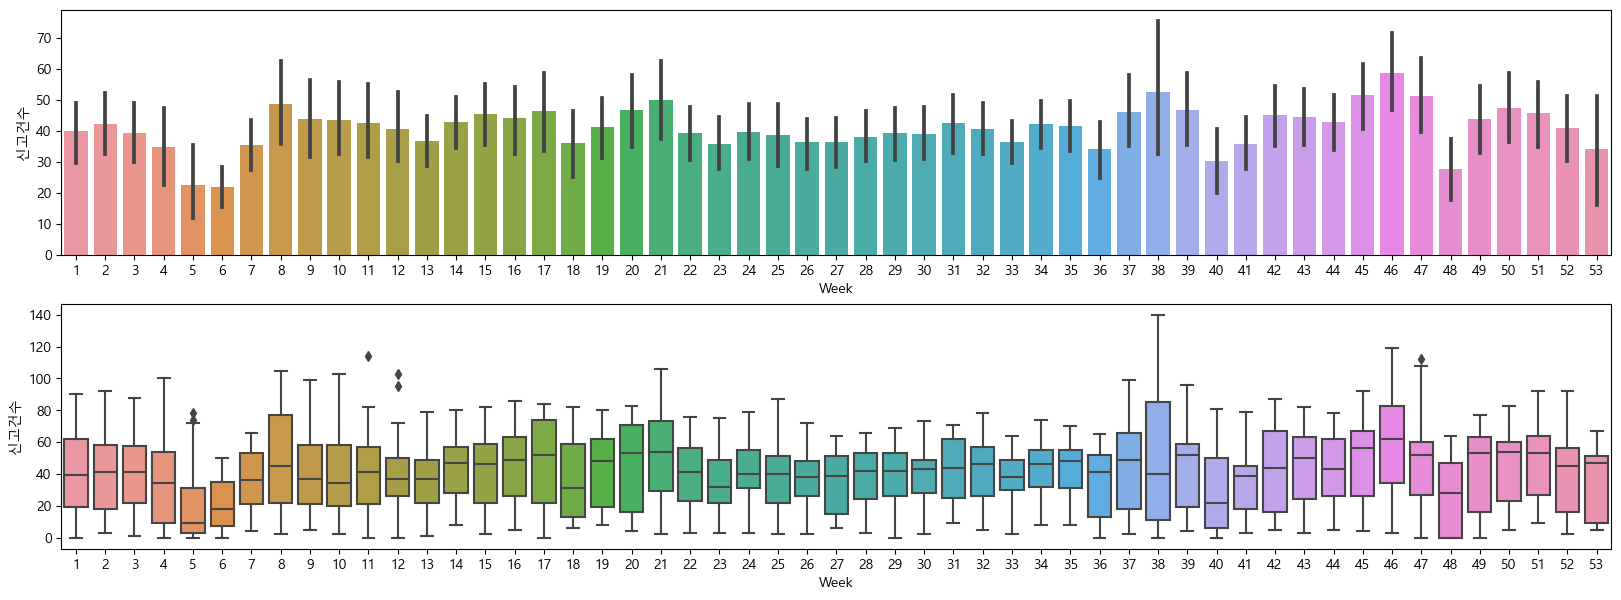

In [137]:
plt.figure(figsize=(4,3))
sns.lineplot(x=real_df['Week'], y=real_df['신고건수'], ci=None)
plt.xlabel('Week')

plt.figure(figsize=(20,7))
plt.subplot(2,1,1)
sns.barplot(x=real_df['Week'], y=real_df['신고건수'])
plt.xlabel('Week')

plt.subplot(2,1,2)
sns.boxplot(x=real_df['Week'], y=real_df['신고건수'])
plt.xlabel('Week')
plt.show()

## 은행영업일 -> 신고건수 tbd : ttest진행할것

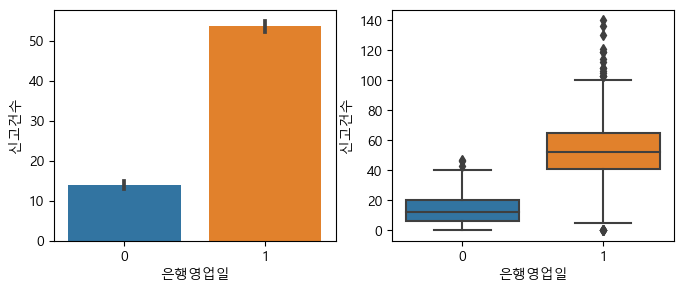

In [141]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x=real_df['은행영업일'], y=real_df['신고건수'])
plt.xlabel('은행영업일')

plt.subplot(1,2,2)
sns.boxplot(x=real_df['은행영업일'], y=real_df['신고건수'])
plt.xlabel('은행영업일')
plt.show()

In [46]:
real_df.isna().sum()

날짜             0
신고건수           0
Week           0
월요일            0
화요일            0
수요일            0
목요일            0
금요일            0
토요일            0
일요일            0
정기적_이벤트        0
비정기적_이벤트       0
뉴스개수           0
금리             0
누적확진자수         0
확진자수           0
소비자물가지수        0
비트코인거래량        0
네이버_보이스피싱      0
다음카카오_보이스피싱    0
구글_보이스피싱       0
네이버_대출         0
다음카카오_대출       0
구글_대출검색        0
은행영업일          0
dtype: int64

In [50]:
bank_close = real_df.loc[real_df['은행영업일'] == 0, '신고건수']
bank_open = real_df.loc[real_df['은행영업일']==1, '신고건수']
spst.ttest_ind(bank_close, bank_open)

Ttest_indResult(statistic=-35.57299445018716, pvalue=1.0787864428602086e-185)

## 토요일 -> 신고건수

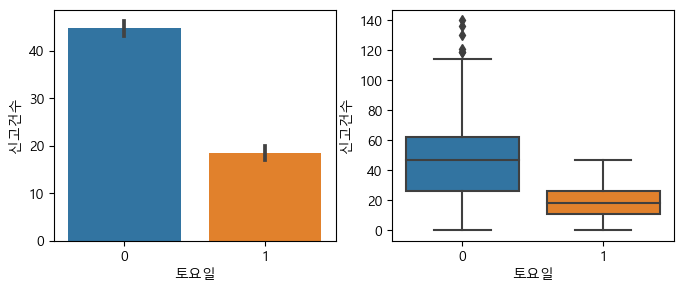

In [130]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x=real_df['토요일'], y=real_df['신고건수'])
plt.xlabel('토요일')

plt.subplot(1,2,2)
sns.boxplot(x=real_df['토요일'], y=real_df['신고건수'])
plt.xlabel('토요일')
plt.show()

In [51]:
sat_x = real_df.loc[real_df['토요일'] == 0, '신고건수']
sat_o = real_df.loc[real_df['토요일']==1, '신고건수']
spst.ttest_ind(sat_x, sat_o)

Ttest_indResult(statistic=12.893840524740938, pvalue=1.495581516006382e-35)

## 일요일 -> 신고건수

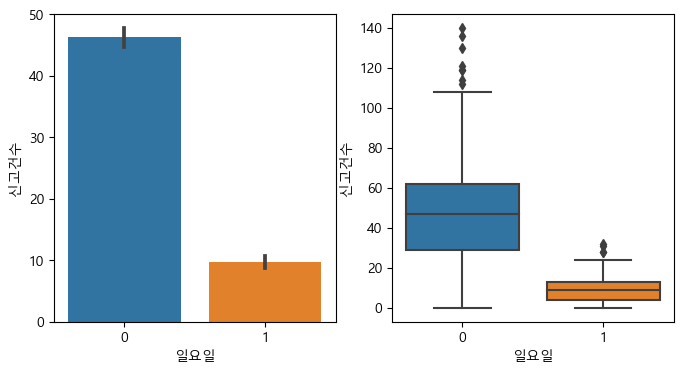

In [142]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.barplot(x=real_df['일요일'], y=real_df['신고건수'])
plt.xlabel('일요일')

plt.subplot(1,2,2)
sns.boxplot(x=real_df['일요일'], y=real_df['신고건수'])
plt.xlabel('일요일')
plt.show()

In [52]:
sun_x = real_df.loc[real_df['일요일'] == 0, '신고건수']
sun_o = real_df.loc[real_df['일요일'] == 1, '신고건수']
spst.ttest_ind(sun_x, sun_o)

Ttest_indResult(statistic=19.361004308690248, pvalue=3.394802203034792e-72)

## 정기적_이벤트 -> 신고건수

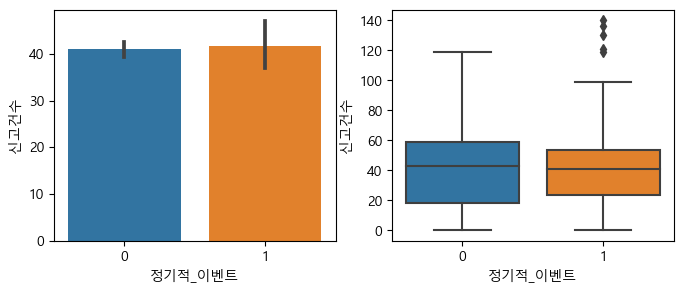

In [144]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x=real_df['정기적_이벤트'], y=real_df['신고건수'])
plt.xlabel('정기적_이벤트')

plt.subplot(1,2,2)
sns.boxplot(x=real_df['정기적_이벤트'], y=real_df['신고건수'])
plt.xlabel('정기적_이벤트')
plt.show()

In [53]:
reg_event_x = real_df.loc[real_df['정기적_이벤트'] == 0, '신고건수']
reg_event_o = real_df.loc[real_df['정기적_이벤트'] == 1, '신고건수']
spst.ttest_ind(reg_event_x, reg_event_o)

Ttest_indResult(statistic=-0.2726317482609665, pvalue=0.7851869215739824)

## 비정기적_이벤트 -> 신고건수

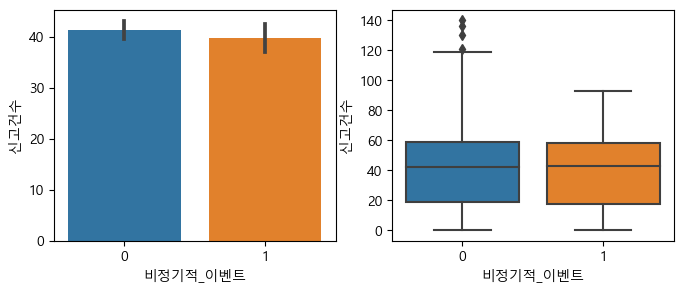

In [147]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x=real_df['비정기적_이벤트'], y=real_df['신고건수'])
plt.xlabel('비정기적_이벤트')

plt.subplot(1,2,2)
sns.boxplot(x=real_df['비정기적_이벤트'], y=real_df['신고건수'])
plt.xlabel('비정기적_이벤트')
plt.show()

In [54]:
non_event_x = real_df.loc[real_df['비정기적_이벤트'] == 0, '신고건수']
non_event_o = real_df.loc[real_df['비정기적_이벤트'] == 1, '신고건수']
spst.ttest_ind(non_event_x, non_event_o)

Ttest_indResult(statistic=0.9084822725931817, pvalue=0.3638203205064485)

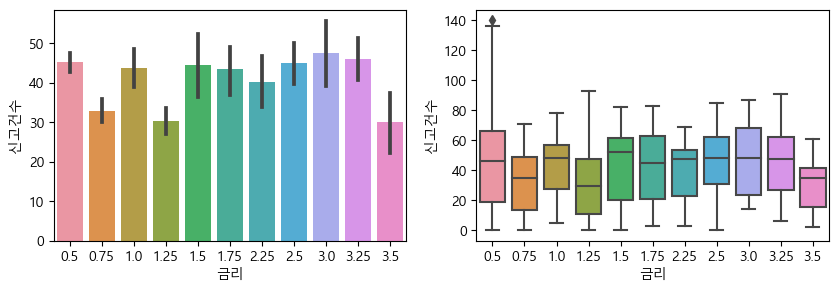

In [149]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.barplot(x=real_df['금리'], y=real_df['신고건수'])
plt.xlabel('금리')

plt.subplot(1,2,2)
sns.boxplot(x=real_df['금리'], y=real_df['신고건수'])
plt.xlabel('금리')
plt.show()